Hello world! Program begins.
Read the data finished
-----------------


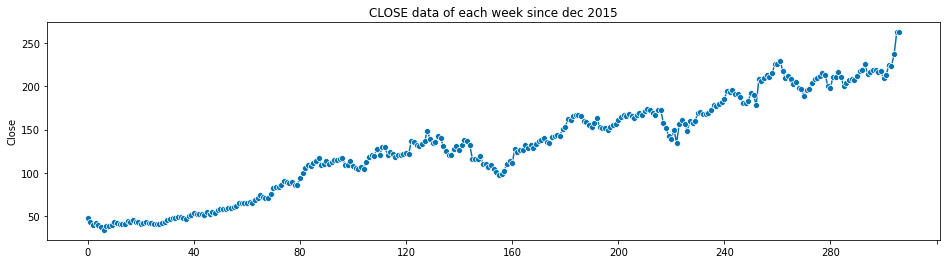

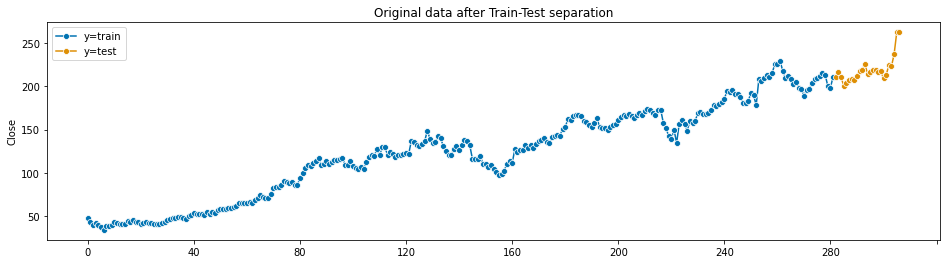

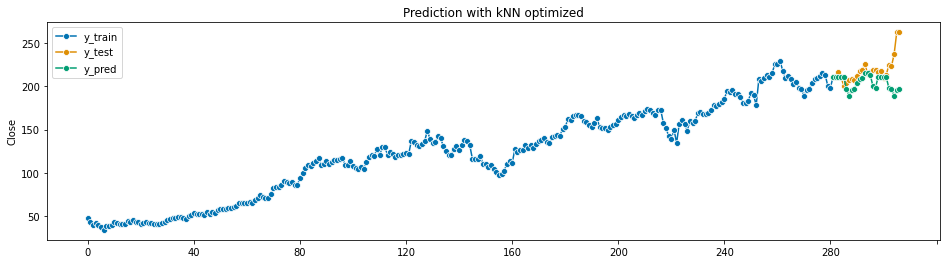

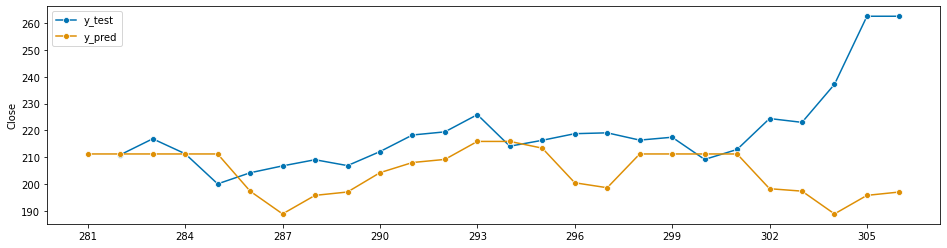

In [21]:
from warnings import simplefilter
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import sklearn as sk
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsRegressor
from sktime.utils.plotting import plot_series
from sktime.forecasting.compose import (
    EnsembleForecaster,
    # MultiplexForecaster,
    ReducedForecaster,
    TransformedTargetForecaster,
)
from sktime.forecasting.model_selection import (
    ExpandingWindowSplitter,
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.bats import BATS
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.transformations.series.detrend import Deseasonalizer, Detrender

simplefilter("ignore", FutureWarning)
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', RuntimeWarning)

print("Hello world! Program begins.")
df1 = pd.read_csv("RACE.csv")
#print("df1.shape", df1.shape)
#print("df1", df1)
print("Read the data finished\n-----------------")

y = pd.Series(data = df1['Close'])
fig1, ax1 = plot_series(y)
ax1.set_title("CLOSE data of each week since dec 2015")



y_train, y_test = temporal_train_test_split(y, test_size = 25)
fig2, ax2 = plot_series(y_train, y_test, labels = ["y=train", "y=test"])
ax2.set_title("Original data after Train-Test separation")
plt.show()

fh = np.arange(len(y_test)+1)
listOfsMAPE = []
regressor = KNeighborsRegressor(n_neighbors = 1)
forecaster = ReducedForecaster(
    regressor, scitype = "regressor", window_length = 15, strategy = "recursive"
)
forecaster.fit(y_train)
y_pred_kNN_bestk = forecaster.predict(fh)
# loss4 = smape_loss(y_test, y_pred_kNN_bestk)
# print("The best sMAPE loss for kNN method is obtained when k =", 1, ", which is:", loss4)
fig4, ax4 = plot_series(y_train, y_test, y_pred_kNN_bestk, labels = ["y_train", "y_test", "y_pred"])
ax4.set_title("Prediction with kNN optimized")
plt.show()
# plot and zoom in the test set
fig4bis, ax4bis = plot_series(y_test, y_pred_kNN_bestk, labels = ["y_test", "y_pred"])
plt.show()
